## Practical 1 ##

In [39]:
import pandas, scipy, numpy
from sklearn.preprocessing import MinMaxScaler
df=pandas.read_csv( 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv ',sep=';')

In [4]:
#PREPROCESSING

#RESCALING OF DATA - we can rescale attributes to possess the same scale

array=df.values
#Separating data into input and output components
x=array[:,0:8]
y=array[:,8]
scaler=MinMaxScaler(feature_range=(0,1))
rescaledX=scaler.fit_transform(x)
numpy.set_printoptions(precision=3) #Setting precision for the output
rescaledX[0:5,:]

array([[0.248, 0.397, 0.   , 0.068, 0.107, 0.141, 0.099, 0.568],
       [0.283, 0.521, 0.   , 0.116, 0.144, 0.338, 0.216, 0.494],
       [0.283, 0.438, 0.04 , 0.096, 0.134, 0.197, 0.17 , 0.509],
       [0.584, 0.11 , 0.56 , 0.068, 0.105, 0.225, 0.191, 0.582],
       [0.248, 0.397, 0.   , 0.068, 0.107, 0.141, 0.099, 0.568]])

In [10]:
#STANDARDIZING THE DATA -  take attributes with a Gaussian distribution and different means and standard deviations
#transform into a standard Gaussian distribution with a mean of 0 and a standard deviation of 1

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(x)
rescaledX = scaler.transform(x)
rescaledX[0:5,:]

array([[-0.528,  0.962, -1.391, -0.453, -0.244, -0.466, -0.379,  0.558],
       [-0.299,  1.967, -1.391,  0.043,  0.224,  0.873,  0.624,  0.028],
       [-0.299,  1.297, -1.186, -0.169,  0.096, -0.084,  0.229,  0.134],
       [ 1.655, -1.384,  1.484, -0.453, -0.265,  0.108,  0.412,  0.664],
       [-0.528,  0.962, -1.391, -0.453, -0.244, -0.466, -0.379,  0.558]])

In [13]:
#NORMALIZING DATA - we rescale each observation to a length of 1 (a unit norm)

from sklearn.preprocessing import Normalizer as nm
scaler=nm().fit(x)
normalizedX=scaler.fit_transform(x)
normalizedX[0:5,:]

array([[2.024e-01, 1.914e-02, 0.000e+00, 5.196e-02, 2.079e-03, 3.008e-01,
        9.299e-01, 2.729e-02],
       [1.083e-01, 1.222e-02, 0.000e+00, 3.611e-02, 1.361e-03, 3.472e-01,
        9.306e-01, 1.385e-02],
       [1.377e-01, 1.342e-02, 7.061e-04, 4.060e-02, 1.624e-03, 2.648e-01,
        9.533e-01, 1.760e-02],
       [1.767e-01, 4.416e-03, 8.833e-03, 2.997e-02, 1.183e-03, 2.681e-01,
        9.464e-01, 1.574e-02],
       [2.024e-01, 1.914e-02, 0.000e+00, 5.196e-02, 2.079e-03, 3.008e-01,
        9.299e-01, 2.729e-02]])

In [17]:
#BINARIZING DATA - a binary threshold, it is possible to transform our 
#data by marking the values above it 1 and those equal to or below it, 0

from sklearn.preprocessing import Binarizer as bn
bin=bn(threshold=1.0).fit(x)
binX=bin.transform(x)
binX[0:5,:]

array([[1., 0., 0., 1., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0., 1., 1., 0.]])

In [21]:
#MEAN REMOVAL - remove the mean from each feature to center it on zero.

from sklearn.preprocessing import scale
data_standardized=scale(df)
data_standardized.mean(axis=0)

array([ 3.555e-16,  1.733e-16, -8.887e-17, -1.244e-16,  3.910e-16,
       -6.221e-17,  4.444e-17,  2.364e-14,  2.862e-15,  6.754e-16,
        1.066e-16,  8.887e-17])

In [22]:
data_standardized.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [28]:
#ONE HOT ENCODING
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()
encoder.fit([[0,1,6,2],
[1,5,3,5],
[2,4,2,7],
[1,0,4,2]])

C:\Users\thakk\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


OneHotEncoder(categorical_features=None, categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='error',
              n_values=None, sparse=True)

In [29]:
encoder.transform([[2,4,3,4]]).toarray()

array([[0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [31]:
#LABEL ENCODING - Label encoding converts word labels into numbers to let algorithms work on them
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
input_classes=['Havells','Philips','Syska','Eveready','Lloyd']
label_encoder.fit(input_classes)

LabelEncoder()

In [32]:
for i,item in enumerate(label_encoder.classes_):
    print(item,'-->',i)

Eveready --> 0
Havells --> 1
Lloyd --> 2
Philips --> 3
Syska --> 4


In [34]:
label_encoder.classes_

array(['Eveready', 'Havells', 'Lloyd', 'Philips', 'Syska'], dtype='<U8')

In [35]:
#ANALYZING THE DATASET

#DESCRIBING
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [37]:
#SHAPE
df.shape

(1599, 12)

In [38]:
#EXTRACTING DATA
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [40]:
#PERFORMING OPERATIONS
df.groupby('quality').size()

quality
3     10
4     53
5    681
6    638
7    199
8     18
dtype: int64

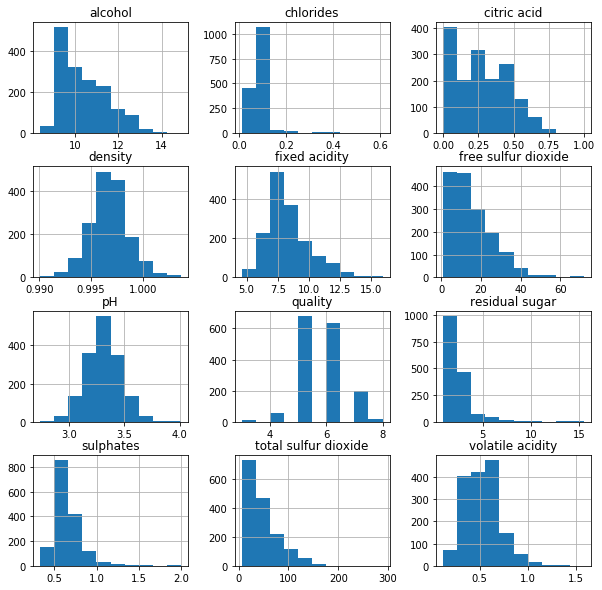

In [66]:
#VISUALIZATION - Univariate

#Histogram

import matplotlib.pyplot as plt
%matplotlib inline
df.hist(figsize=(10,10))
plt.show()

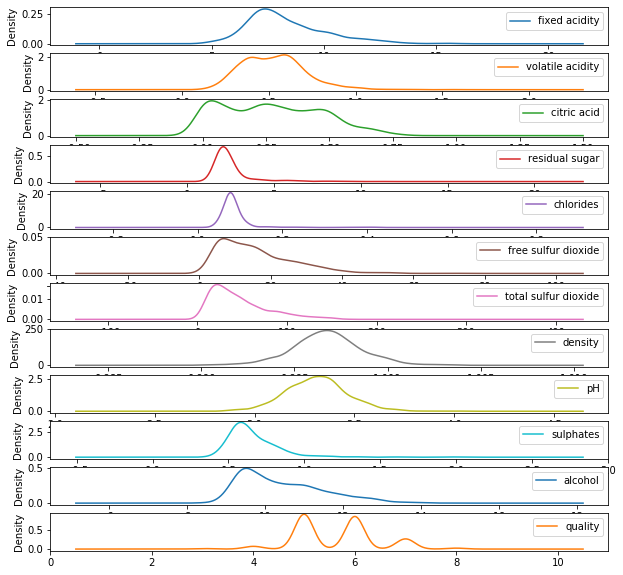

In [64]:
#Density Plot
df.plot(kind='density',subplots=True,sharex=False,figsize=(10,10))
plt.show()

fixed acidity              AxesSubplot(0.125,0.125;0.0545775x0.755)
volatile acidity        AxesSubplot(0.190493,0.125;0.0545775x0.755)
citric acid             AxesSubplot(0.255986,0.125;0.0545775x0.755)
residual sugar          AxesSubplot(0.321479,0.125;0.0545775x0.755)
chlorides               AxesSubplot(0.386972,0.125;0.0545775x0.755)
free sulfur dioxide     AxesSubplot(0.452465,0.125;0.0545775x0.755)
total sulfur dioxide    AxesSubplot(0.517958,0.125;0.0545775x0.755)
density                 AxesSubplot(0.583451,0.125;0.0545775x0.755)
pH                      AxesSubplot(0.648944,0.125;0.0545775x0.755)
sulphates               AxesSubplot(0.714437,0.125;0.0545775x0.755)
alcohol                  AxesSubplot(0.77993,0.125;0.0545775x0.755)
quality                 AxesSubplot(0.845423,0.125;0.0545775x0.755)
dtype: object

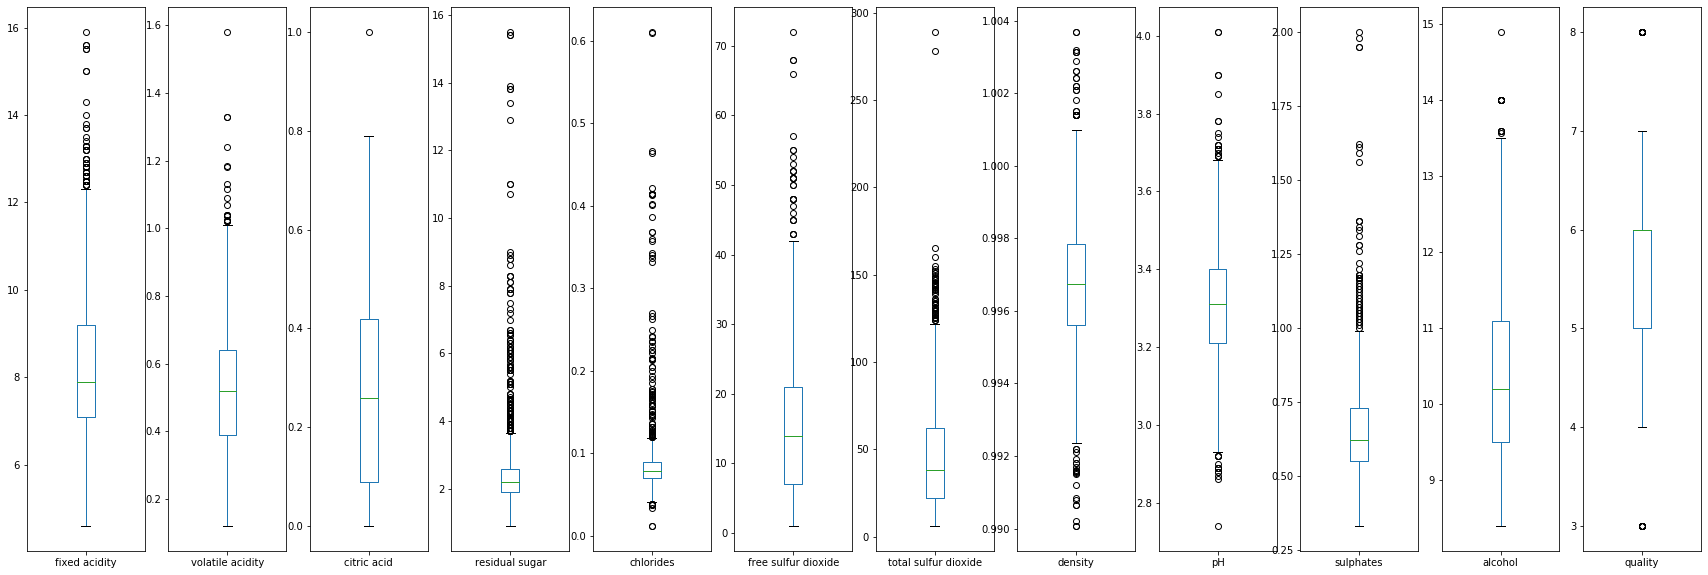

In [72]:
#Box and Whiskers
df.plot(kind='box',subplots=True,sharex=False,sharey=False,figsize=(30,10))


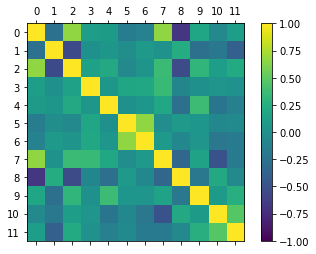

In [84]:
#VISUALIZING - Multivariate

#Correlation Matrix
correlations=df.corr()
fig=plt.figure()
ax=fig.add_subplot(111)
cax=ax.matshow(correlations,vmin=-1,vmax=1)
fig.colorbar(cax)
ticks=numpy.arange(0,12,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
plt.show()

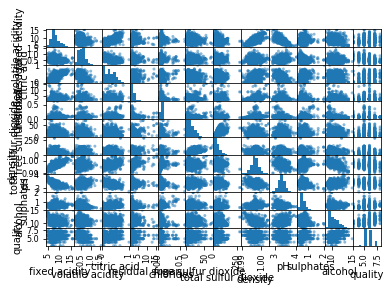

In [86]:
#Scatter Plot Matrix
pandas.plotting.scatter_matrix(df)
plt.show()

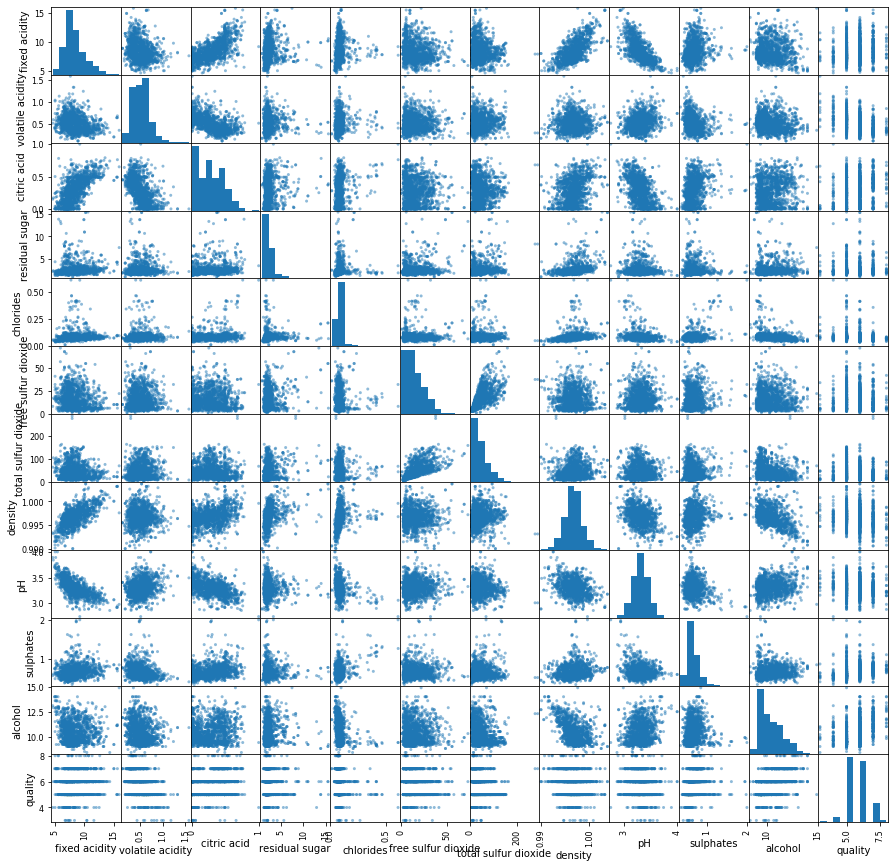

In [88]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize=(15, 15))
plt.show()

## Practical 2 ##

In [90]:
ds = pandas.read_csv('adult.csv')
ds.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [91]:
ds.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [98]:
df[df.eq('?').any(1)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


## Practical 3 ##

In [4]:
import pandas as pd
import numpy as np

#DATA WRANGLING

one=pd.DataFrame({
  'emp_id':[101,102,103,104,105,106],
  'dept_name':['CSE','IT','ME','CV','BioTech','ECE'],
  'aisle':[1,2,3,np.nan,5,6]})
first=pd.DataFrame(one)
two=pd.DataFrame({
  'emp_id':[107,108,109,110,111,112],
  'dept_name':['BCA','BSC','MCA','MSc','MTech','MBA'],
  'aisle':[7,8,9,10,np.nan,12]})
second=pd.DataFrame(two)

In [5]:
first

,emp_id,dept_name,aisle
0,101,CSE,1.0
1,102,IT,2.0
2,103,ME,3.0
3,104,CV,NaN
4,105,BioTech,5.0
5,106,ECE,6.0


In [6]:
second

,emp_id,dept_name,aisle
0,107,BCA,7.0
1,108,BSC,8.0
2,109,MCA,9.0
3,110,MSc,10.0
4,111,MTech,NaN
5,112,MBA,12.0


In [8]:
pd.isnull(first).any()

emp_id       False
dept_name    False
aisle         True
dtype: bool

In [9]:
pd.isnull(second).any()

emp_id       False
dept_name    False
aisle         True
dtype: bool

In [16]:
a=first.dropna()
a

,emp_id,dept_name,aisle
0,101,CSE,1.0
1,102,IT,2.0
2,103,ME,3.0
4,105,BioTech,5.0
5,106,ECE,6.0


In [17]:
b=second.dropna()
b

,emp_id,dept_name,aisle
0,107,BCA,7.0
1,108,BSC,8.0
2,109,MCA,9.0
3,110,MSc,10.0
5,112,MBA,12.0


In [13]:
first.groupby('aisle').dept_name.value_counts()

aisle  dept_name
1.0    CSE          1
2.0    IT           1
3.0    ME           1
5.0    BioTech      1
6.0    ECE          1
Name: dept_name, dtype: int64

In [14]:
second.groupby('aisle').dept_name.value_counts()

aisle  dept_name
7.0    BCA          1
8.0    BSC          1
9.0    MCA          1
10.0   MSc          1
12.0   MBA          1
Name: dept_name, dtype: int64

In [15]:
first.aisle.unique()

array([ 1.,  2.,  3., nan,  5.,  6.])

In [18]:
a.aisle.unique()

array([1., 2., 3., 5., 6.])

In [19]:
b.aisle.unique()

array([ 7.,  8.,  9., 10., 12.])

In [20]:
a.dept_name.unique()

array(['CSE', 'IT', 'ME', 'BioTech', 'ECE'], dtype=object)

In [21]:
len(a)

5

In [22]:
len(first)

6

In [25]:
two[two['aisle']>9]

,emp_id,dept_name,aisle
3,110,MSc,10.0
5,112,MBA,12.0


In [26]:
one[one['aisle']==2]

,emp_id,dept_name,aisle
1,102,IT,2.0


In [27]:
two[(two['aisle']>=8) & (two['dept_name']=='MBA')]

,emp_id,dept_name,aisle
5,112,MBA,12.0


In [33]:
two[(two['aisle']<13) & ((two['dept_name']=='MBA') | (two['dept_name']=='MSc'))]

,emp_id,dept_name,aisle
3,110,MSc,10.0
5,112,MBA,12.0


In [34]:
two[(two['aisle']>=8) & (two['dept_name']=='MBA')].describe()

,emp_id,aisle
count,1.0,1.0
mean,112.0,12.0
std,NaN,NaN
min,112.0,12.0
25%,112.0,12.0
50%,112.0,12.0
75%,112.0,12.0
max,112.0,12.0


In [35]:
(two.pivot(index='emp_id',columns='aisle',values='dept_name')).tail()

aisle,nan,7.0,8.0,9.0,10.0,12.0
emp_id,,,,,,
108,NaN,NaN,BSC,NaN,NaN,NaN
109,NaN,NaN,NaN,MCA,NaN,NaN
110,NaN,NaN,NaN,NaN,MSc,NaN
111,MTech,NaN,NaN,NaN,NaN,NaN
112,NaN,NaN,NaN,NaN,NaN,MBA


In [36]:
(two.pivot(index='dept_name',columns='emp_id',values='aisle')).tail()

emp_id,107,108,109,110,111,112
dept_name,,,,,,
BSC,NaN,8.0,NaN,NaN,NaN,NaN
MBA,NaN,NaN,NaN,NaN,NaN,12.0
MCA,NaN,NaN,9.0,NaN,NaN,NaN
MSc,NaN,NaN,NaN,10.0,NaN,NaN
MTech,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
(two.pivot(index='emp_id',columns='aisle',values='dept_name'))

aisle,nan,7.0,8.0,9.0,10.0,12.0
emp_id,,,,,,
107,NaN,BCA,NaN,NaN,NaN,NaN
108,NaN,NaN,BSC,NaN,NaN,NaN
109,NaN,NaN,NaN,MCA,NaN,NaN
110,NaN,NaN,NaN,NaN,MSc,NaN
111,MTech,NaN,NaN,NaN,NaN,NaN
112,NaN,NaN,NaN,NaN,NaN,MBA


In [52]:
(two.pivot(index='emp_id',columns='aisle',values='dept_name')).shift(1)

aisle,nan,7.0,8.0,9.0,10.0,12.0
emp_id,,,,,,
107,NaN,NaN,NaN,NaN,NaN,NaN
108,NaN,BCA,NaN,NaN,NaN,NaN
109,NaN,NaN,BSC,NaN,NaN,NaN
110,NaN,NaN,NaN,MCA,NaN,NaN
111,NaN,NaN,NaN,NaN,MSc,NaN
112,MTech,NaN,NaN,NaN,NaN,NaN


In [51]:
(two.pivot(index='emp_id',columns='aisle',values='dept_name')).shift(-1)

aisle,nan,7.0,8.0,9.0,10.0,12.0
emp_id,,,,,,
107,NaN,NaN,BSC,NaN,NaN,NaN
108,NaN,NaN,NaN,MCA,NaN,NaN
109,NaN,NaN,NaN,NaN,MSc,NaN
110,MTech,NaN,NaN,NaN,NaN,NaN
111,NaN,NaN,NaN,NaN,NaN,MBA
112,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
(two.melt(id_vars=['emp_id'],value_name='dept_name'))

,emp_id,variable,dept_name
0,107,dept_name,BCA
1,108,dept_name,BSC
2,109,dept_name,MCA
3,110,dept_name,MSc
4,111,dept_name,MTech
5,112,dept_name,MBA
6,107,aisle,7
7,108,aisle,8
8,109,aisle,9
9,110,aisle,10


In [56]:
(two.melt(id_vars=['aisle'],value_name='value'))

,aisle,variable,value
0,7.0,emp_id,107
1,8.0,emp_id,108
2,9.0,emp_id,109
3,10.0,emp_id,110
4,NaN,emp_id,111
5,12.0,emp_id,112
6,7.0,dept_name,BCA
7,8.0,dept_name,BSC
8,9.0,dept_name,MCA
9,10.0,dept_name,MSc


In [55]:
melt1=two.melt(id_vars=['emp_id'],value_name='value1')
melt2=two.melt(id_vars=['emp_id'],value_name='value2')
pd.merge(melt1,melt2,on=['emp_id'])

,emp_id,variable_x,value1,variable_y,value2
0,107,dept_name,BCA,dept_name,BCA
1,107,dept_name,BCA,aisle,7
2,107,aisle,7,dept_name,BCA
3,107,aisle,7,aisle,7
4,108,dept_name,BSC,dept_name,BSC
5,108,dept_name,BSC,aisle,8
6,108,aisle,8,dept_name,BSC
7,108,aisle,8,aisle,8
8,109,dept_name,MCA,dept_name,MCA
9,109,dept_name,MCA,aisle,9


In [60]:
from functools import reduce
base=two[['aisle','dept_name','emp_id']]
feature=[base]+[melt1,melt2]
abt=reduce(lambda left,right: pd.merge(left,right,on=['emp_id']),[melt1,melt2])
abt

,emp_id,variable_x,value1,variable_y,value2
0,107,dept_name,BCA,dept_name,BCA
1,107,dept_name,BCA,aisle,7
2,107,aisle,7,dept_name,BCA
3,107,aisle,7,aisle,7
4,108,dept_name,BSC,dept_name,BSC
5,108,dept_name,BSC,aisle,8
6,108,aisle,8,dept_name,BSC
7,108,aisle,8,aisle,8
8,109,dept_name,MCA,dept_name,MCA
9,109,dept_name,MCA,aisle,9


In [62]:
pd.concat([a,b])

,emp_id,dept_name,aisle
0,101,CSE,1.0
1,102,IT,2.0
2,103,ME,3.0
4,105,BioTech,5.0
5,106,ECE,6.0
0,107,BCA,7.0
1,108,BSC,8.0
2,109,MCA,9.0
3,110,MSc,10.0
5,112,MBA,12.0


In [63]:
pd.concat([b,a])

,emp_id,dept_name,aisle
0,107,BCA,7.0
1,108,BSC,8.0
2,109,MCA,9.0
3,110,MSc,10.0
5,112,MBA,12.0
0,101,CSE,1.0
1,102,IT,2.0
2,103,ME,3.0
4,105,BioTech,5.0
5,106,ECE,6.0


In [65]:
res=pd.concat([a,b])
res.to_csv('res.csv')

In [67]:
ds = pd.read_csv('res.csv')
ds

,Unnamed: 0,emp_id,dept_name,aisle
0,0,101,CSE,1.0
1,1,102,IT,2.0
2,2,103,ME,3.0
3,4,105,BioTech,5.0
4,5,106,ECE,6.0
5,0,107,BCA,7.0
6,1,108,BSC,8.0
7,2,109,MCA,9.0
8,3,110,MSc,10.0
9,5,112,MBA,12.0


In [72]:
#DATA AGGREGATION

df=pd.DataFrame(np.random.randn(8,4),
  index=pd.date_range('17/11/2019',periods=8),
  columns=['A','B','C','D'])
df

,A,B,C,D
2019-11-17,-1.166017,-0.171886,0.615749,-0.624804
2019-11-18,-1.760277,-0.237722,-0.607612,-2.495604
2019-11-19,-0.948451,-0.629656,0.845382,-0.005986
2019-11-20,0.561701,-0.764692,-0.382967,0.883123
2019-11-21,0.512895,-0.259649,1.584417,0.856631
2019-11-22,-0.614195,0.079757,1.676043,-0.220410
2019-11-23,2.131798,0.261331,1.717730,-0.787406
2019-11-24,-1.700755,-0.354243,0.385954,-0.324747


In [92]:
print(df.rolling(window=4,min_periods=1))
#In a very simple words we take a window size of k at a time and perform some desired mathematical operation on it.
#A window of size k means k consecutive values at a time.

Rolling [window=4,min_periods=1,center=False,axis=0]


In [100]:
df.rolling(window=4,min_periods=1).sum() 

,A,B,C,D
2019-11-17,-1.166017,-0.171886,0.615749,-0.624804
2019-11-18,-2.926294,-0.409608,0.008137,-3.120408
2019-11-19,-3.874746,-1.039263,0.853519,-3.126394
2019-11-20,-3.313044,-1.803956,0.470552,-2.243271
2019-11-21,-1.634132,-1.891718,1.439220,-0.761836
2019-11-22,-0.488050,-1.574239,3.722875,1.513358
2019-11-23,2.592200,-0.683253,4.595223,0.731938
2019-11-24,0.329744,-0.272804,5.364144,-0.475931


In [96]:
r=df.rolling(window=4,min_periods=1)
r.aggregate(np.sum)

,A,B,C,D
2019-11-17,-1.166017,-0.171886,0.615749,-0.624804
2019-11-18,-2.926294,-0.409608,0.008137,-3.120408
2019-11-19,-3.874746,-1.039263,0.853519,-3.126394
2019-11-20,-3.313044,-1.803956,0.470552,-2.243271
2019-11-21,-1.634132,-1.891718,1.439220,-0.761836
2019-11-22,-0.488050,-1.574239,3.722875,1.513358
2019-11-23,2.592200,-0.683253,4.595223,0.731938
2019-11-24,0.329744,-0.272804,5.364144,-0.475931


In [97]:
r.aggregate(np.max)

,A,B,C,D
2019-11-17,-1.166017,-0.171886,0.615749,-0.624804
2019-11-18,-1.166017,-0.171886,0.615749,-0.624804
2019-11-19,-0.948451,-0.171886,0.845382,-0.005986
2019-11-20,0.561701,-0.171886,0.845382,0.883123
2019-11-21,0.561701,-0.237722,1.584417,0.883123
2019-11-22,0.561701,0.079757,1.676043,0.883123
2019-11-23,2.131798,0.261331,1.717730,0.883123
2019-11-24,2.131798,0.261331,1.717730,0.856631


In [99]:
r['B'].aggregate(np.mean)

2019-11-17   -0.171886
2019-11-18   -0.204804
2019-11-19   -0.346421
2019-11-20   -0.450989
2019-11-21   -0.472930
2019-11-22   -0.393560
2019-11-23   -0.170813
2019-11-24   -0.068201
Freq: D, Name: B, dtype: float64

In [101]:
r[['B','C']].aggregate(np.sum)

,B,C
2019-11-17,-0.171886,0.615749
2019-11-18,-0.409608,0.008137
2019-11-19,-1.039263,0.853519
2019-11-20,-1.803956,0.470552
2019-11-21,-1.891718,1.439220
2019-11-22,-1.574239,3.722875
2019-11-23,-0.683253,4.595223
2019-11-24,-0.272804,5.364144


## PRACTICAL 4 ##